In [31]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns
from PIL import Image

In [32]:
annotation_file = "/home/r15user2/Documents/Multi-seq-mae/input_data/temporal_CXR/mimic_annotation.json"
with open(annotation_file) as f:
    annotation = json.load(f)

In [33]:
test_anno = annotation["test"]
test_df = pd.DataFrame(test_anno)

In [34]:
test_df.head()

,id,study_id,subject_id,report,image_path,split,ViewPosition,StudyDate,StudyTime,No Finding,...,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,e2856783-ffa5ec26-043b0303-21aeddc6-b11b2876,57977208,10046166,"In comparison with the study of ___, there is ...",[p10/p10046166/s57977208/e2856783-ffa5ec26-043...,test,AP,21321208.0,124850.843,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18f0fd6d-f513afc9-e4aa8de2-bc5ac0d6-ea3daaff,53492798,10046166,Frontal and lateral radiographs of the chest r...,[p10/p10046166/s53492798/18f0fd6d-f513afc9-e4a...,test,PA,21330306.0,200000.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,e5ba5704-ce2f09d3-e28fe2a2-8a9aca96-86f4966a,57379357,10046166,Frontal and lateral views of the chest were ob...,[p10/p10046166/s57379357/e5ba5704-ce2f09d3-e28...,test,AP,21330321.0,115719.296,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,Lateral view somewhat limited due to overlying...,[p10/p10046166/s50051329/abea5eb9-b7c32823-3a1...,test,AP,21331006.0,4228.656,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,053e0fdd-17dbee89-17885e49-08249a30-7f829c9c,51513702,10268877,Single AP portable view of the chest. No prio...,[p10/p10268877/s51513702/053e0fdd-17dbee89-178...,test,AP,21810228.0,215032.437,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
report = test_df.loc[test_df["id"] == "a8c08cbf-15ac0dac-b76a40a0-dab826c7-18015767", "report"].values
print(report)

image_dir = "/home/r15user2/Documents/Multi-seq-mae/input_data/mimic_data/2.0.0/files"
image_path = test_df.loc[test_df["id"] == "edfd806e-5c672eea-1119d9d0-44c282a8-7c3d9730", "image_path"].values[0][0]

['PA and lateral chest views have been obtained with patient in\n upright position.  Comparison is made with the next preceding similar study of\n ___.  Heart size and mediastinal structures are unchanged.  The\n previously described remaining pleural densities along the upper right lateral\n chest wall in the shoulder area show diminished thickness of the pleural\n density surrounding the operative area.  Postoperative localized apical\n pneumothorax has diminished further and is now barely 1 cm wide, also showing\n increasing pleural scar formation.  No new abnormalities are seen.  The left\n hemithorax is unchanged, though no evidence of new pulmonary abnormalities.']


(-0.5, 383.5, 383.5, -0.5)

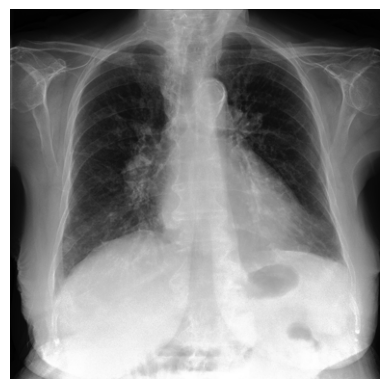

In [36]:
img = Image.open(os.path.join(image_dir, image_path)).convert("RGB")
img = img.resize((384, 384))

# axes[i].imshow(img)
# axes[i].set_axis_off()
plt.imshow(img)
plt.axis("off")

In [65]:
test_df["subject_id"].value_counts()[test_df["subject_id"].value_counts() >= 3]

subject_id
13475033    46
19182863    46
15131736    41
14851532    36
16826047    32
            ..
19640059     3
15144601     3
15881535     3
14969719     3
14855790     3
Name: count, Length: 214, dtype: int64

In [81]:
sub_df = test_df.loc[test_df["subject_id"] == 14969719].sort_values(["StudyDate", "StudyTime"])
sub_df[['StudyDate', 'StudyTime', 'id', 'image_path', 'report']]

,StudyDate,StudyTime,id,image_path,report
1034,21570217.0,155734.000,b758e8f4-574ee6a8-32a4c691-81f94a5b-96a0773c,[p14/p14969719/s58351102/b758e8f4-574ee6a8-32a...,"Following right thoracocentesis, a large right..."
1035,21570220.0,185845.843,95e57a26-a6de4499-4dddba72-f21f0627-c864e681,[p14/p14969719/s51427095/95e57a26-a6de4499-4dd...,Right-sided Port-A-Cath tip\n terminates withi...
1036,21570225.0,52019.140,ea9b867c-c8a2b175-f813e34d-9ae7229d-23ab7c24,[p14/p14969719/s59937017/ea9b867c-c8a2b175-f81...,There is little change since ___. A right subc...


In [87]:
test_df.loc[test_df["subject_id"] == 14969719]["report"].values

array(['Following right thoracocentesis, a large right pleural effusion has\n substantially improved with residual mild-to-moderate fluid.  Mediastinum is\n central in position.  Ill-defined opacity in the right upper lung is\n consolidation unless proven otherwise.  A 5.5 discrete, nodular opacity in the\n left mid lung is a calcified granuloma as demonstrated from CT component of\n PET/CT dated ___. Mild atelectasis is present in the right lower\n lung and middle lobe.  Right-sided Port-A-Cath ends at lower SVC.',
       'Right-sided Port-A-Cath tip\n terminates within the SVC.  Calcified prevascular lymph node is\n redemonstrated.  A moderate-to-large right pleural effusion appears similar\n when compared to the prior reference chest radiograph, and has increased when\n compared to the prior chest radiograph of ___.  Previously noted\n right upper lobe consolidation persists, and may be slightly improved when\n compared to the prior study.  No pneumothorax is demonstrated.  Left bas

In [88]:
select_df = test_df.loc[test_df["subject_id"] == 14969719]
select_df.sort_values(by="StudyDate", inplace=True)
select_df.reset_index(drop=True, inplace=True)
select_df

/tmp/ipykernel_1407752/3499947217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.sort_values(by="StudyDate", inplace=True)


,id,study_id,subject_id,report,image_path,split,ViewPosition,StudyDate,StudyTime,No Finding,...,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,b758e8f4-574ee6a8-32a4c691-81f94a5b-96a0773c,58351102,14969719,"Following right thoracocentesis, a large right...",[p14/p14969719/s58351102/b758e8f4-574ee6a8-32a...,test,PA,21570217.0,155734.000,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,95e57a26-a6de4499-4dddba72-f21f0627-c864e681,51427095,14969719,Right-sided Port-A-Cath tip\n terminates withi...,[p14/p14969719/s51427095/95e57a26-a6de4499-4dd...,test,AP,21570220.0,185845.843,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ea9b867c-c8a2b175-f813e34d-9ae7229d-23ab7c24,59937017,14969719,There is little change since ___. A right subc...,[p14/p14969719/s59937017/ea9b867c-c8a2b175-f81...,test,AP,21570225.0,52019.140,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
select_df["StudyDate"] - select_df["StudyDate"].min()

0    0.0
1    3.0
2    8.0
Name: StudyDate, dtype: float64

In [73]:
for i in range(len(select_df)):
    print(select_df.loc[i, "report"])

Lung volumes are diminished which exaggerates the cardiomediastinal
 configuration.  However, even accounting for this change, there has been a
 relative dramatic increase in the size of the cardiac silhouette with now
 somewhat globular morphology.  Ill-defined opacity is noted in the
 retrocardiac left lower lobe which is likely atelectasis given the volume
 loss.  There is no focal consolidation.  No definite effusion or pneumothorax
 is seen.  The osseous structures are unremarkable.  Incidental note is made of
 internal fixation hardware, incompletely evaluated, involving the mid
 diaphysis of the right clavicle.  Tubing loops over the epigastric region and
 with the tip projecting at the dome of the left hemidiaphragm over the cardiac
 silhouette.
The cardiomediastinal silhouette, pulmonary vasculature, and aorta are within
 normal limits.  There is an airspace opacity lateral to the right heart border
 on frontal projection.  Right clavicular orthopedic side plate is unchanged.


(-0.5, 383.5, 383.5, -0.5)

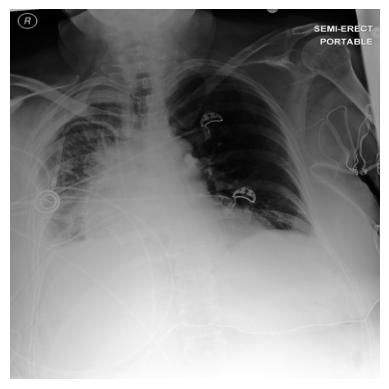

In [92]:
row = select_df.iloc[2]
image_path = row.image_path[0]

img = Image.open(os.path.join(image_dir, image_path)).convert("RGB")
img = img.resize((384, 384))

# axes[i].imshow(img)
# axes[i].set_axis_off()
plt.imshow(img)
plt.axis("off")

In [43]:
(0.478 - 0.475) / 0.475

0.0063157894736842165

In [44]:
train_anno = annotation["train"]
train_df = pd.DataFrame(train_anno)

In [45]:
train_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145471 entries, 0 to 145470
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          145471 non-null  object 
 1   study_id                    145471 non-null  int64  
 2   subject_id                  145471 non-null  int64  
 3   report                      145471 non-null  object 
 4   image_path                  145471 non-null  object 
 5   split                       145471 non-null  object 
 6   ViewPosition                145471 non-null  object 
 7   StudyDate                   145471 non-null  float64
 8   StudyTime                   145471 non-null  float64
 9   No Finding                  145471 non-null  float64
 10  Enlarged Cardiomediastinum  145471 non-null  float64
 11  Cardiomegaly                145471 non-null  float64
 12  Lung Lesion                 145471 non-null  float64
 13  Lung Opacity  

In [46]:
pt_cnts = train_df["subject_id"].value_counts()
subject_ids = pt_cnts[pt_cnts >= 4].index.tolist()

In [47]:
len(subject_ids)

10161

In [48]:
ptid = subject_ids[0]
pt_df = train_df[train_df["subject_id"] == ptid]
pt_df.replace({-1: 0}, inplace=True)
pt_df.drop_duplicates(subset=["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"], inplace=True)
pt_df.sort_values(by=["StudyDate", "StudyTime"], inplace=True)
pt_df = pt_df.iloc[:5]
# pt_df = pt_df.sample(5, random_state=42)
pt_df.sort_values(by=["StudyDate", "StudyTime"], inplace=True)
disease_df = pt_df[["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"]]

/tmp/ipykernel_1407752/3449978066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_df.replace({-1: 0}, inplace=True)
/tmp/ipykernel_1407752/3449978066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_df.drop_duplicates(subset=["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"], inplace=True)
/tmp/ipykernel_1407752/3449978066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_df.sort_values(by=["S

In [49]:
pt_df

,id,study_id,subject_id,report,image_path,split,ViewPosition,StudyDate,StudyTime,No Finding,...,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
93950,487a1be8-0436f4e0-607d9efc-239959dd-05bab7b7,55797204,16454913,Frontal and lateral views of the chest are obt...,[p16/p16454913/s55797204/487a1be8-0436f4e0-607...,train,PA,21440630.0,144038.687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93954,df07b87a-9116c721-e6d4e613-c3438b6b-534f8458,54842977,16454913,Compared to prior from ___.\n \n The heart siz...,[p16/p16454913/s54842977/df07b87a-9116c721-e6d...,train,AP,21441009.0,32659.296,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
93956,e80a478e-2cef3ccb-2149ccf5-ccd4b52a-46d3f814,50536873,16454913,Comparison is made to previous study from ___....,[p16/p16454913/s50536873/e80a478e-2cef3ccb-214...,train,AP,21441225.0,62118.687,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
93963,e1ebb541-0b03d454-1c1efa2e-d49967ba-e2a7730b,57664848,16454913,The tracheostomy tube is again visualized. NG...,[p16/p16454913/s57664848/e1ebb541-0b03d454-1c1...,train,AP,21450102.0,42614.765,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
93975,47eb51e9-d50a9b63-c191fa35-57da7d90-9c37db35,57543603,16454913,Bedside AP radiograph of the chest depicts sta...,[p16/p16454913/s57543603/47eb51e9-d50a9b63-c19...,train,AP,21450125.0,53224.296,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
i = 0
print(pt_df.iloc[i]["report"])
print()

Frontal and lateral views of the chest are obtained.  There is
 bibasilar atelectasis.  No discrete focal consolidation is seen.  There may be
 very minimal pulmonary vascular congestion.  The cardiac and mediastinal
 silhouettes are stable.



In [51]:
i = 1
print(pt_df.iloc[i]["report"])
print()

Compared to prior from ___.
 
 The heart size is upper limits of normal but stable.  There has been
 development of a right-sided pleural effusion with blunting of the CP angle. 
 There is some atelectasis at the lung bases.  There are no signs for overt
 pulmonary edema.  No pneumothoraces are identified.



In [52]:
i = 2
print(pt_df.iloc[i]["report"])
print()

Comparison is made to previous study from ___.
 
 The endotracheal tube tip has been pulled back slightly and is at the level of
 the clavicular heads, 6 cm above the carina.  There remains cardiomegaly and
 prominence of mediastinum.  There is a right-sided chest tube whose distal tip
 is at the lung apex.  There is improvement of the subcutaneous emphysema along
 the right chest wall.  There are again seen bilateral pleural effusions, which
 are stable.  There is also some improvement of the airspace opacities since
 the previous study.



(-0.5, 383.5, 383.5, -0.5)

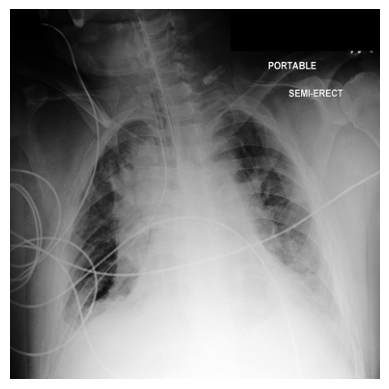

In [53]:
# fig, axes = plt.subplots(1, len(pt_df))
# fig.set_figwidth(15)
# fig.set_figheight(4)
image_dir = "/home/r15user2/Documents/Multi-seq-mae/input_data/mimic_data/2.0.0/files"
# for i, row in enumerate(pt_df.itertuples()):
row = pt_df.iloc[2]
image_path = row.image_path[0]

img = Image.open(os.path.join(image_dir, image_path)).convert("RGB")
img = img.resize((384, 384))

# axes[i].imshow(img)
# axes[i].set_axis_off()
plt.imshow(img)
plt.axis("off")

In [54]:
study_dates = pt_df["StudyDate"] - pt_df["StudyDate"].min()
print(study_dates)

93950       0.0
93954     379.0
93956     595.0
93963    9472.0
93975    9495.0
Name: StudyDate, dtype: float64


In [55]:
# # % matplotlib notebook

# diseases = ["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"]

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 12))  # Width=10 inches, Height=6 inches

# # Add a 3D subplot
# ax = fig.add_subplot(111, projection='3d')

# # fig = plt.figure(figsize=(12, 4))
# # ax = plt.axes(projection='3d')
# # fig.set_figwidth(12)
# # fig.set_figheight(4)

# time_points = np.arange(5)


# all_x, all_y, all_z = [], [], []
# for i in range(5):
#     values = disease_df.iloc[:, i].values
#     x_new = np.linspace(time_points.min(), time_points.max(), 300)
#     spl = make_interp_spline(time_points, values, k=3)  # Cubic spline interpolation
#     y_smooth = spl(x_new)
#     # all_x.append(x_new)
#     # all_z.append(y_smooth)
#     # all_y.append([i] * len(x_new))

#     ax.plot3D(x_new, [i] * len(x_new), y_smooth, label=diseases[i], linewidth=3)

# x_scale=2
# y_scale=2
# z_scale=1

# scale=np.diag([x_scale, y_scale, z_scale, 1.0])
# scale=scale*(1.0/scale.max())
# scale[3,3]=1.0
# def short_proj():
#   return np.dot(Axes3D.get_proj(ax), scale)
# ax.get_proj = short_proj   


# # make the panes transparent
# # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# # # make the grid lines transparent
# # ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# # ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# # ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# ax.view_init(20, 70)
# ax.set_xlabel("Time", fontsize=14)
# ax.set_xticks(time_points)
# ax.set_ylabel("Disease", fontsize=14, rotation=90)
# ax.set_yticks([0, 1, 2, 3, 4])
# # ax.set_zlabel("Probability", fontsize=14, rotation=10)
# ax.set_zlim(0, 1)
# # ax.set_zticks(['Absense', 'Presense'])
# # ax.set_zticklabels(["Absense", "Presence"], fontsize=14)

# # ax.set_xticks(time_points)
# # ax.set_xticklabels(["Date 1", "Date 2", "Date 3", "Date 4", "Date 5"], fontsize=14)
# # ax.set_yticks([0, 1], ['Absense', 'Presense'])
# # ax.set_yticklabels(['Absense', 'Presense'], fontsize=14)
# # ax.text(-0.4, 0.3, "Consolidation", fontsize=14, rotation=90)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
#           ncol=3, fancybox=True, shadow=True, fontsize=14)
# # ax.legend()
# # ax.grid(True)}

# # ax.set_axis_off()
# # fig, ax = plt.subplots(1, 1)
# # fig.set_figwidth(10)
# # ax.bar(diseases, disease_df.iloc[1])
# # ax.set_yticklabels([0.1, 1.0])
# # ax.set_xticklabels(diseases, fontsize=14)
# # ax.set_ylim(0, 1)
# # ax.grid()

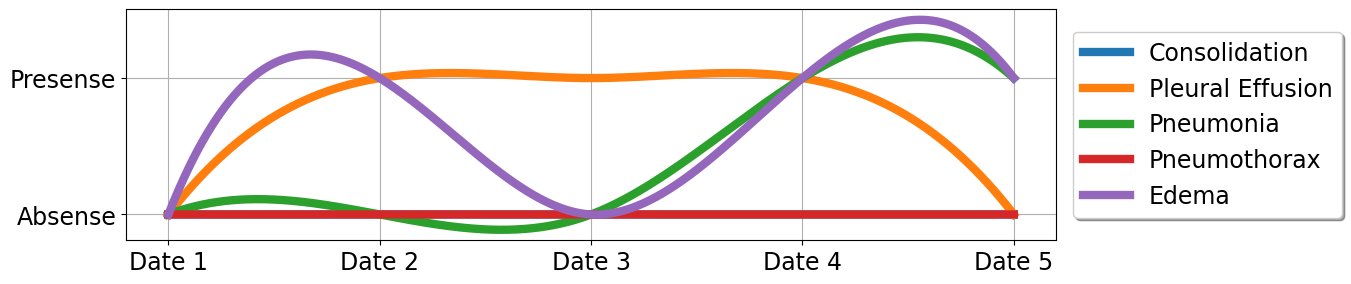

In [56]:
diseases = ["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"]

fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(3)

time_points = np.arange(5)
fontsize = 17
for i in range(5):
    values = disease_df.iloc[:, i].values
    x_new = np.linspace(time_points.min(), time_points.max(), 2000)
    spl = make_interp_spline(time_points, values, k=3)  # Cubic spline interpolation
    y_smooth = spl(x_new)
    ax.plot(x_new, y_smooth, label=diseases[i], linewidth=6)
    # ax.scatter(time_points, values, marker="x", s=100)

ax.set_xticks(time_points)
ax.set_xticklabels(["Date 1", "Date 2", "Date 3", "Date 4", "Date 5"], fontsize=fontsize)
ax.set_yticks([0, 1], ['Absense', 'Presense'])
ax.set_yticklabels(['Absense', 'Presense'], fontsize=fontsize)
ax.legend(loc='center right', bbox_to_anchor=(1.32, 0.5),
          ncol=1, fancybox=True, shadow=True, fontsize=fontsize)
ax.grid(True)
# ax.set_axis_off()
# # fig, ax = plt.subplots(1, 1)
# # fig.set_figwidth(10)
# # ax.bar(diseases, disease_df.iloc[1])
# # ax.set_yticklabels([0.1, 1.0])
# # ax.set_xticklabels(diseases, fontsize=14)
# # ax.set_ylim(0, 1)
# # ax.grid()
plt.savefig('demo.png', transparent=True, bbox_inches = 'tight')

<Axes: >

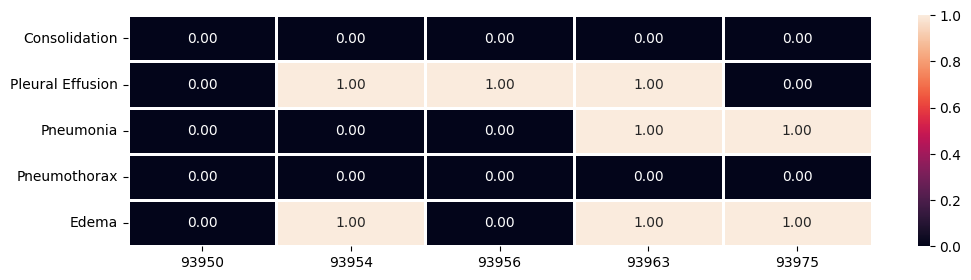

In [57]:
from scipy.interpolate import splrep, BSpline
# x = pt_df["StudyDate"] 
# y = pt_df["Consolidation"]
# tck = splrep(x, y, s=2000)
# plt.plot(x, BSpline(*tck)(x), label="Consolidation")
# sns.lineplot(x="StudyDate", y="Consolidation", data=pt_df)
fig, ax = plt.subplots(figsize=(12, 3))
# fig.set_figheight(5)
# fig.set_figwidth(10)
sns.heatmap(pt_df[["Consolidation", "Pleural Effusion", "Pneumonia", "Pneumothorax", "Edema"]].T, 
            annot=True,fmt='.2f',
            # cmap='cubehelix',
            linewidths=1)

In [58]:
pt_df

,id,study_id,subject_id,report,image_path,split,ViewPosition,StudyDate,StudyTime,No Finding,...,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
93950,487a1be8-0436f4e0-607d9efc-239959dd-05bab7b7,55797204,16454913,Frontal and lateral views of the chest are obt...,[p16/p16454913/s55797204/487a1be8-0436f4e0-607...,train,PA,21440630.0,144038.687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93954,df07b87a-9116c721-e6d4e613-c3438b6b-534f8458,54842977,16454913,Compared to prior from ___.\n \n The heart siz...,[p16/p16454913/s54842977/df07b87a-9116c721-e6d...,train,AP,21441009.0,32659.296,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
93956,e80a478e-2cef3ccb-2149ccf5-ccd4b52a-46d3f814,50536873,16454913,Comparison is made to previous study from ___....,[p16/p16454913/s50536873/e80a478e-2cef3ccb-214...,train,AP,21441225.0,62118.687,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
93963,e1ebb541-0b03d454-1c1efa2e-d49967ba-e2a7730b,57664848,16454913,The tracheostomy tube is again visualized. NG...,[p16/p16454913/s57664848/e1ebb541-0b03d454-1c1...,train,AP,21450102.0,42614.765,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
93975,47eb51e9-d50a9b63-c191fa35-57da7d90-9c37db35,57543603,16454913,Bedside AP radiograph of the chest depicts sta...,[p16/p16454913/s57543603/47eb51e9-d50a9b63-c19...,train,AP,21450125.0,53224.296,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
(0.376 - 0.365) / 0.365

0.030136986301369892

In [60]:
(0.236 - 0.226) / 0.226

0.044247787610619385